In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400 #high res figures
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Cleaned_Application_Data.csv')

In [22]:
df.head()

,Loan_Num,Loan_Stat,Loan_Amt,Time_Employed,State,Cred_Score,Grade,Response,Region,Time_work
0,68355089,Fully Paid,24700.0,10+ years,SD,719.0,C,Accepted,Midwest,above 10 years
1,68426831,Fully Paid,11950.0,4 years,GA,694.0,C,Accepted,Southeast,3-5 years
2,67275481,Fully Paid,20000.0,10+ years,SC,709.0,B,Accepted,Southeast,above 10 years
3,68616873,Fully Paid,8000.0,10+ years,RI,704.0,B,Accepted,Northeast,above 10 years
4,68356421,Current,22400.0,6 years,SC,714.0,C,Accepted,Southeast,6-10 years


In [3]:
df.loc[df['Response']=='Accepted',['Response_Binary']]=1
df.loc[~(df['Response']=='Accepted'),['Response_Binary']]=0

In [4]:
df['Response_Binary'].value_counts()

1.0    398199
0.0    160907
Name: Response_Binary, dtype: int64

In [5]:
df.head()

,Loan_Num,Loan_Stat,Loan_Amt,Time_Employed,State,Cred_Score,Grade,Response,Region,Time_work,Response_Binary
0,68355089,Fully Paid,24700.0,10+ years,SD,719.0,C,Accepted,Midwest,above 10 years,1.0
1,68426831,Fully Paid,11950.0,4 years,GA,694.0,C,Accepted,Southeast,3-5 years,1.0
2,67275481,Fully Paid,20000.0,10+ years,SC,709.0,B,Accepted,Southeast,above 10 years,1.0
3,68616873,Fully Paid,8000.0,10+ years,RI,704.0,B,Accepted,Northeast,above 10 years,1.0
4,68356421,Current,22400.0,6 years,SC,714.0,C,Accepted,Southeast,6-10 years,1.0


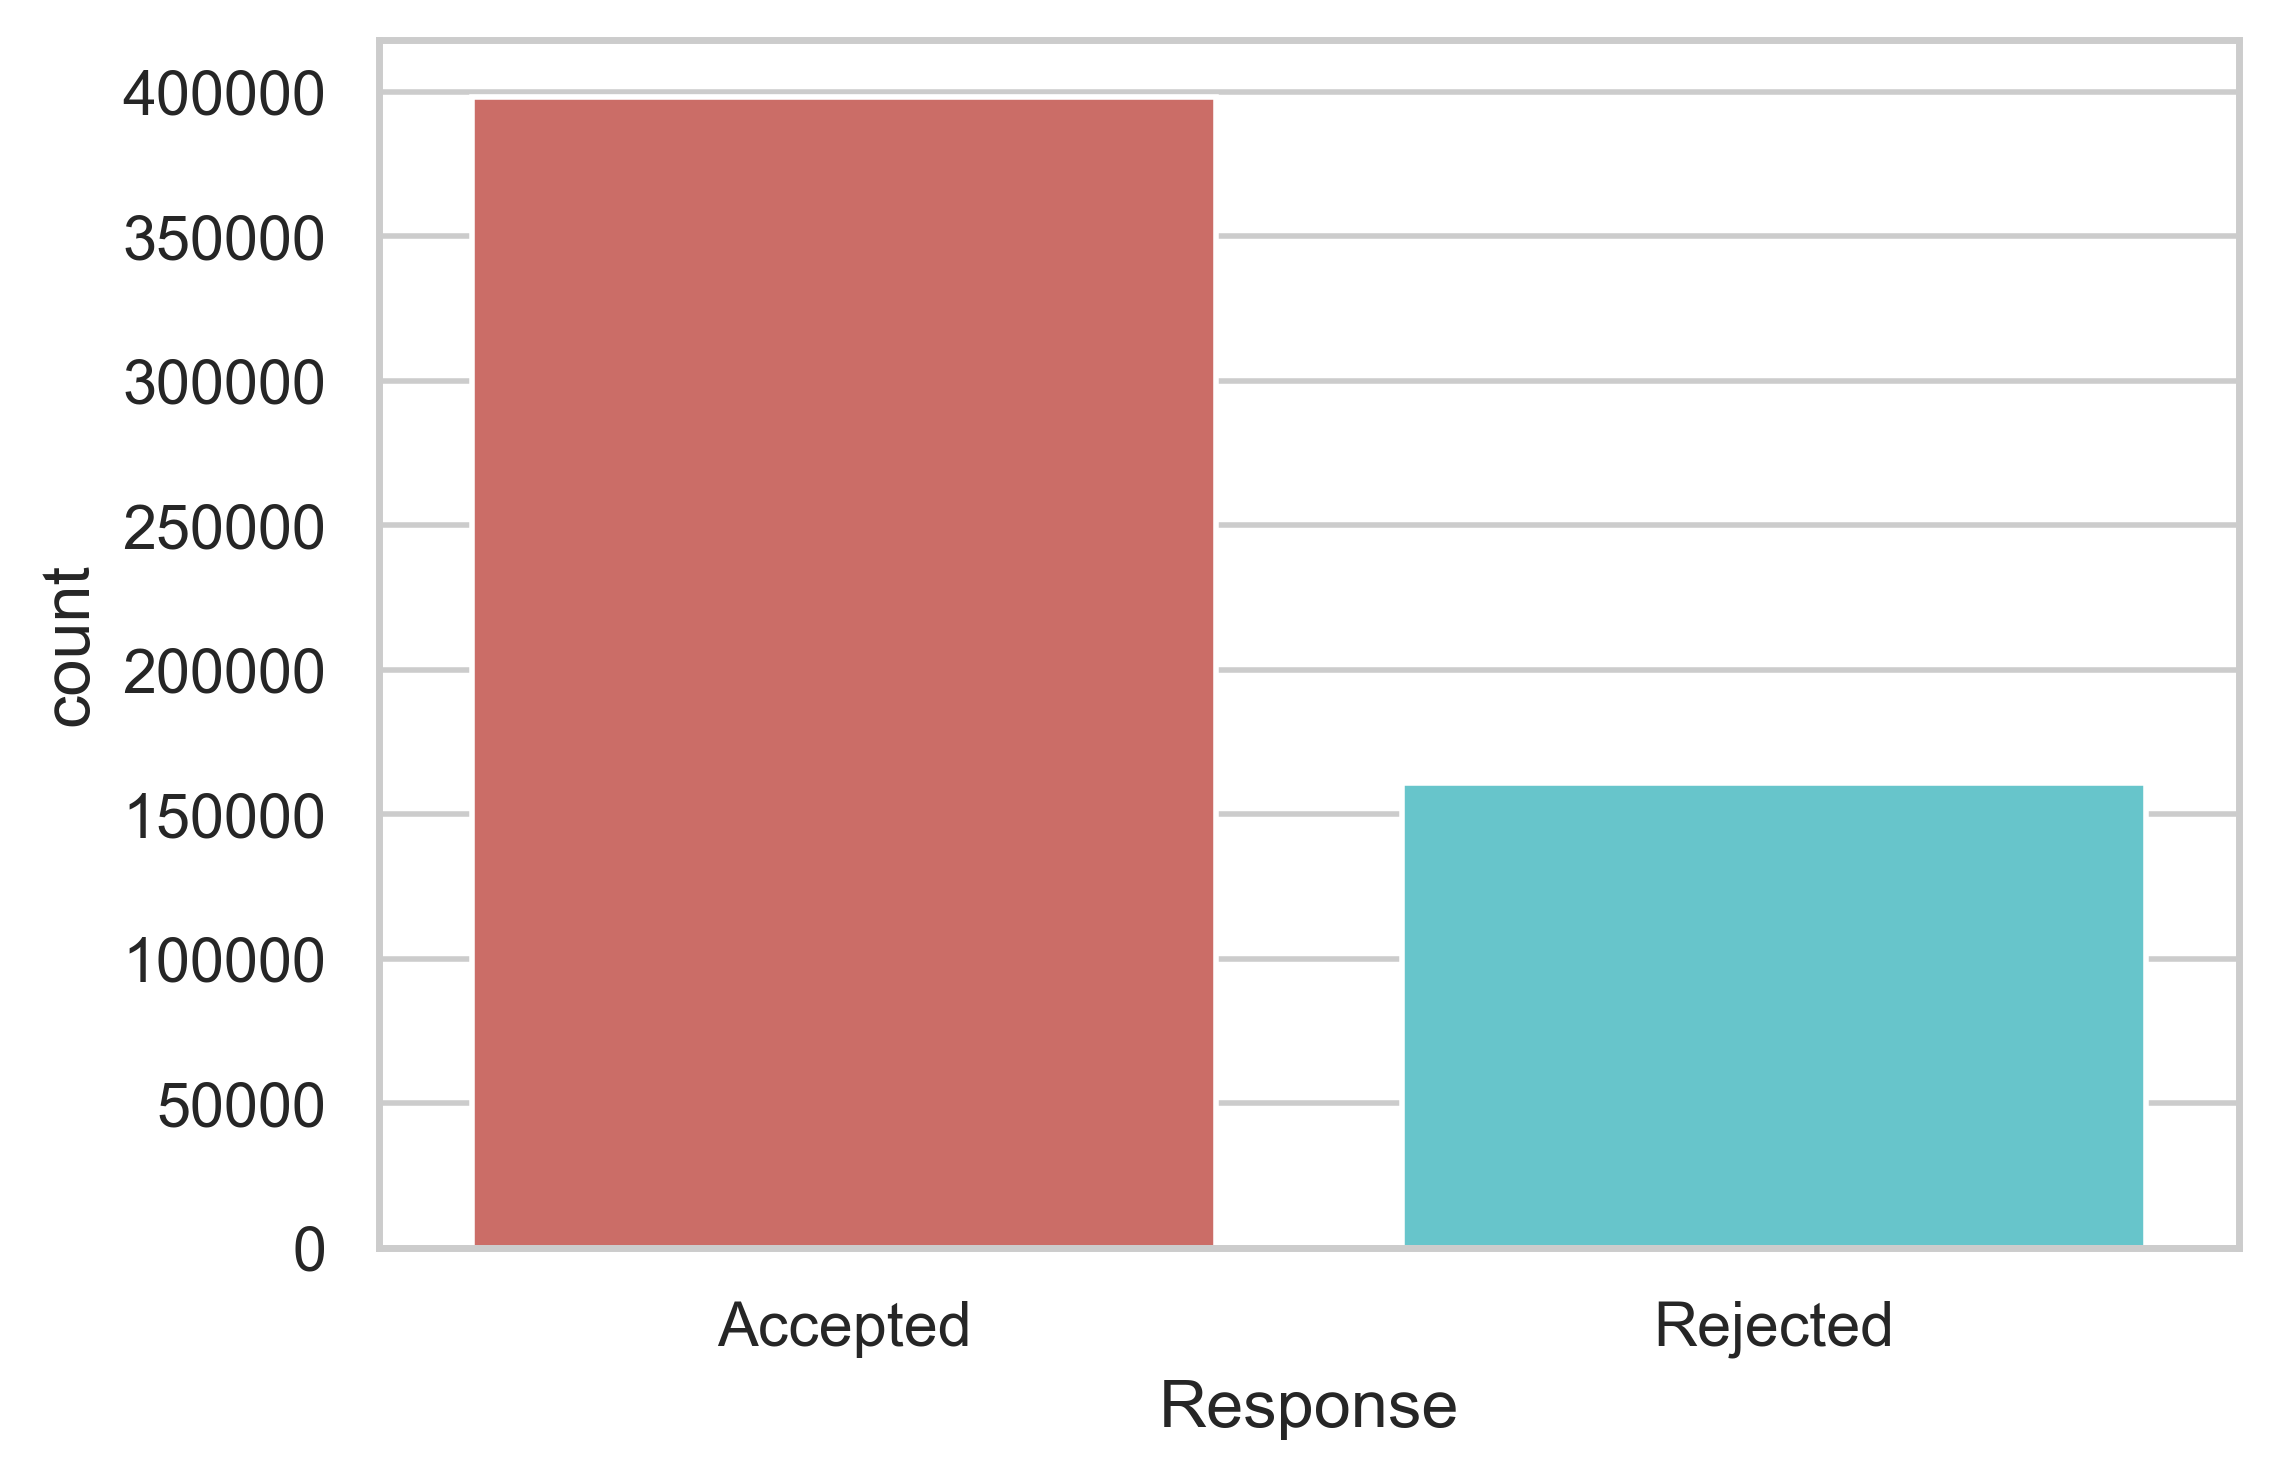

<Figure size 2400x1600 with 0 Axes>

In [6]:
sns.countplot(x='Response',data = df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [7]:
# Proportion of Application accepted.
df['Response_Binary'].mean()

0.7122066298698279

### Before we go into build model, we do more exploration

In [8]:
df.groupby('Loan_Stat').mean()

,Loan_Num,Loan_Amt,Cred_Score,Response_Binary
Loan_Stat,,,,
Charged Off,7.142515e+07,16012.914749,690.884707,0.000000
Current,1.129756e+08,16380.849079,706.054313,0.813268
Default,1.104276e+08,14823.076923,704.384615,0.000000
Fully Paid,7.092233e+07,14458.450222,701.772466,0.811380
In Grace Period,1.061925e+08,17998.850085,694.485520,0.643952
Late (16-30 days),1.055755e+08,18042.942255,695.481210,0.638863
Late (31-120 days),1.075293e+08,17373.258339,695.776407,0.637943


In [9]:
df.groupby('Time_work').mean()

,Loan_Num,Loan_Amt,Cred_Score,Response_Binary
Time_work,,,,
3-5 years,8.971157e+07,14879.266443,701.134448,0.707804
6-10 years,8.570530e+07,15412.788703,701.814775,0.703953
above 10 years,8.863714e+07,16443.532701,703.365546,0.722774
under 2 years,8.984432e+07,14688.500637,701.371815,0.706678


In [10]:
df.groupby('Region').mean()

,Loan_Num,Loan_Amt,Cred_Score,Response_Binary
Region,,,,
Midwest,8.857627e+07,15162.536565,702.334979,0.719373
Northeast,8.904716e+07,15595.566388,702.740258,0.712079
Southeast,8.844363e+07,15276.783039,701.604742,0.701213
Southwest,8.878461e+07,15816.292486,702.466430,0.709249
West,8.859680e+07,15643.591837,701.590473,0.719812


In [12]:
df.groupby('Grade').mean()

,Loan_Num,Loan_Amt,Cred_Score,Response_Binary
Grade,,,,
A,9.340387e+07,15097.555612,730.625135,0.968335
B,8.918646e+07,14643.743239,702.781736,0.921124
C,8.871771e+07,15367.526278,692.807425,0.866939
D,8.710071e+07,16150.925437,687.672924,0.000000
E,7.766591e+07,17960.363484,686.747549,0.000000
F,7.655199e+07,19727.430313,685.539115,0.000000
G,8.691918e+07,20629.132668,684.515261,0.000000


Text(0, 0.5, 'Frequency of Acceptance')

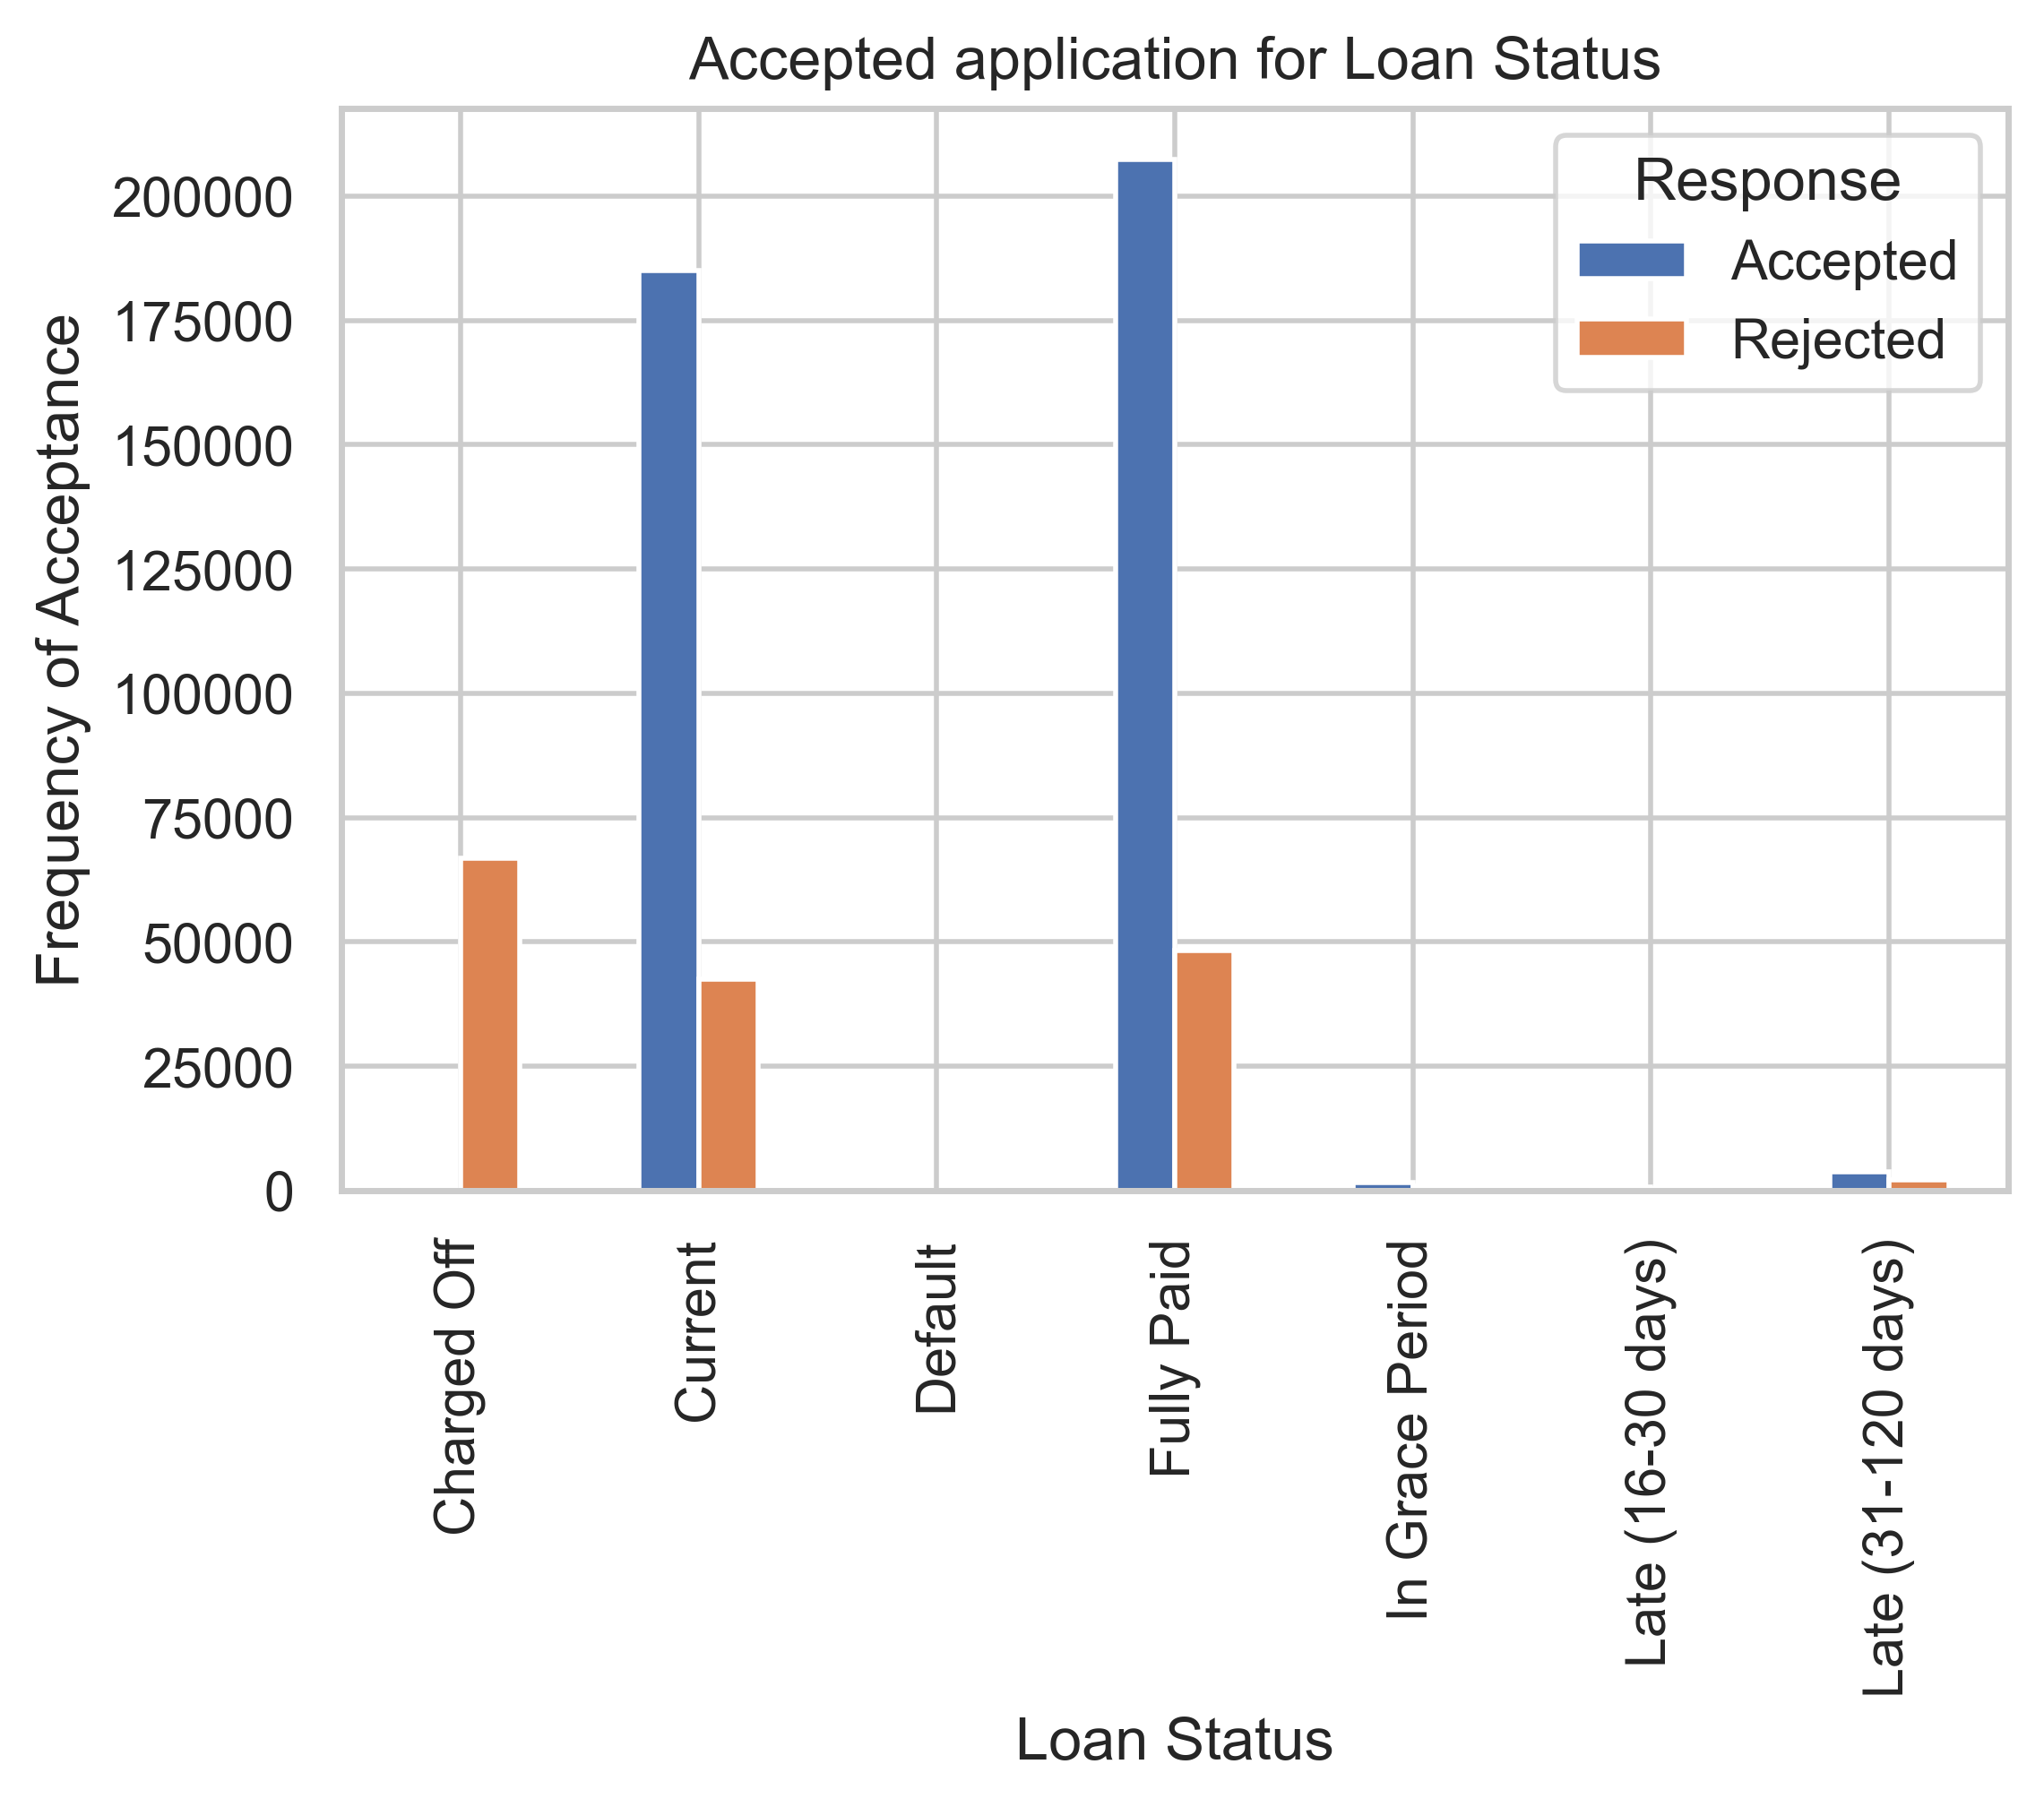

In [14]:
pd.crosstab(df['Loan_Stat'],df['Response']).plot(kind='bar')
plt.title('Accepted application for Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency of Acceptance')

Text(0, 0.5, 'Proportion of Acceptance and Rejection')

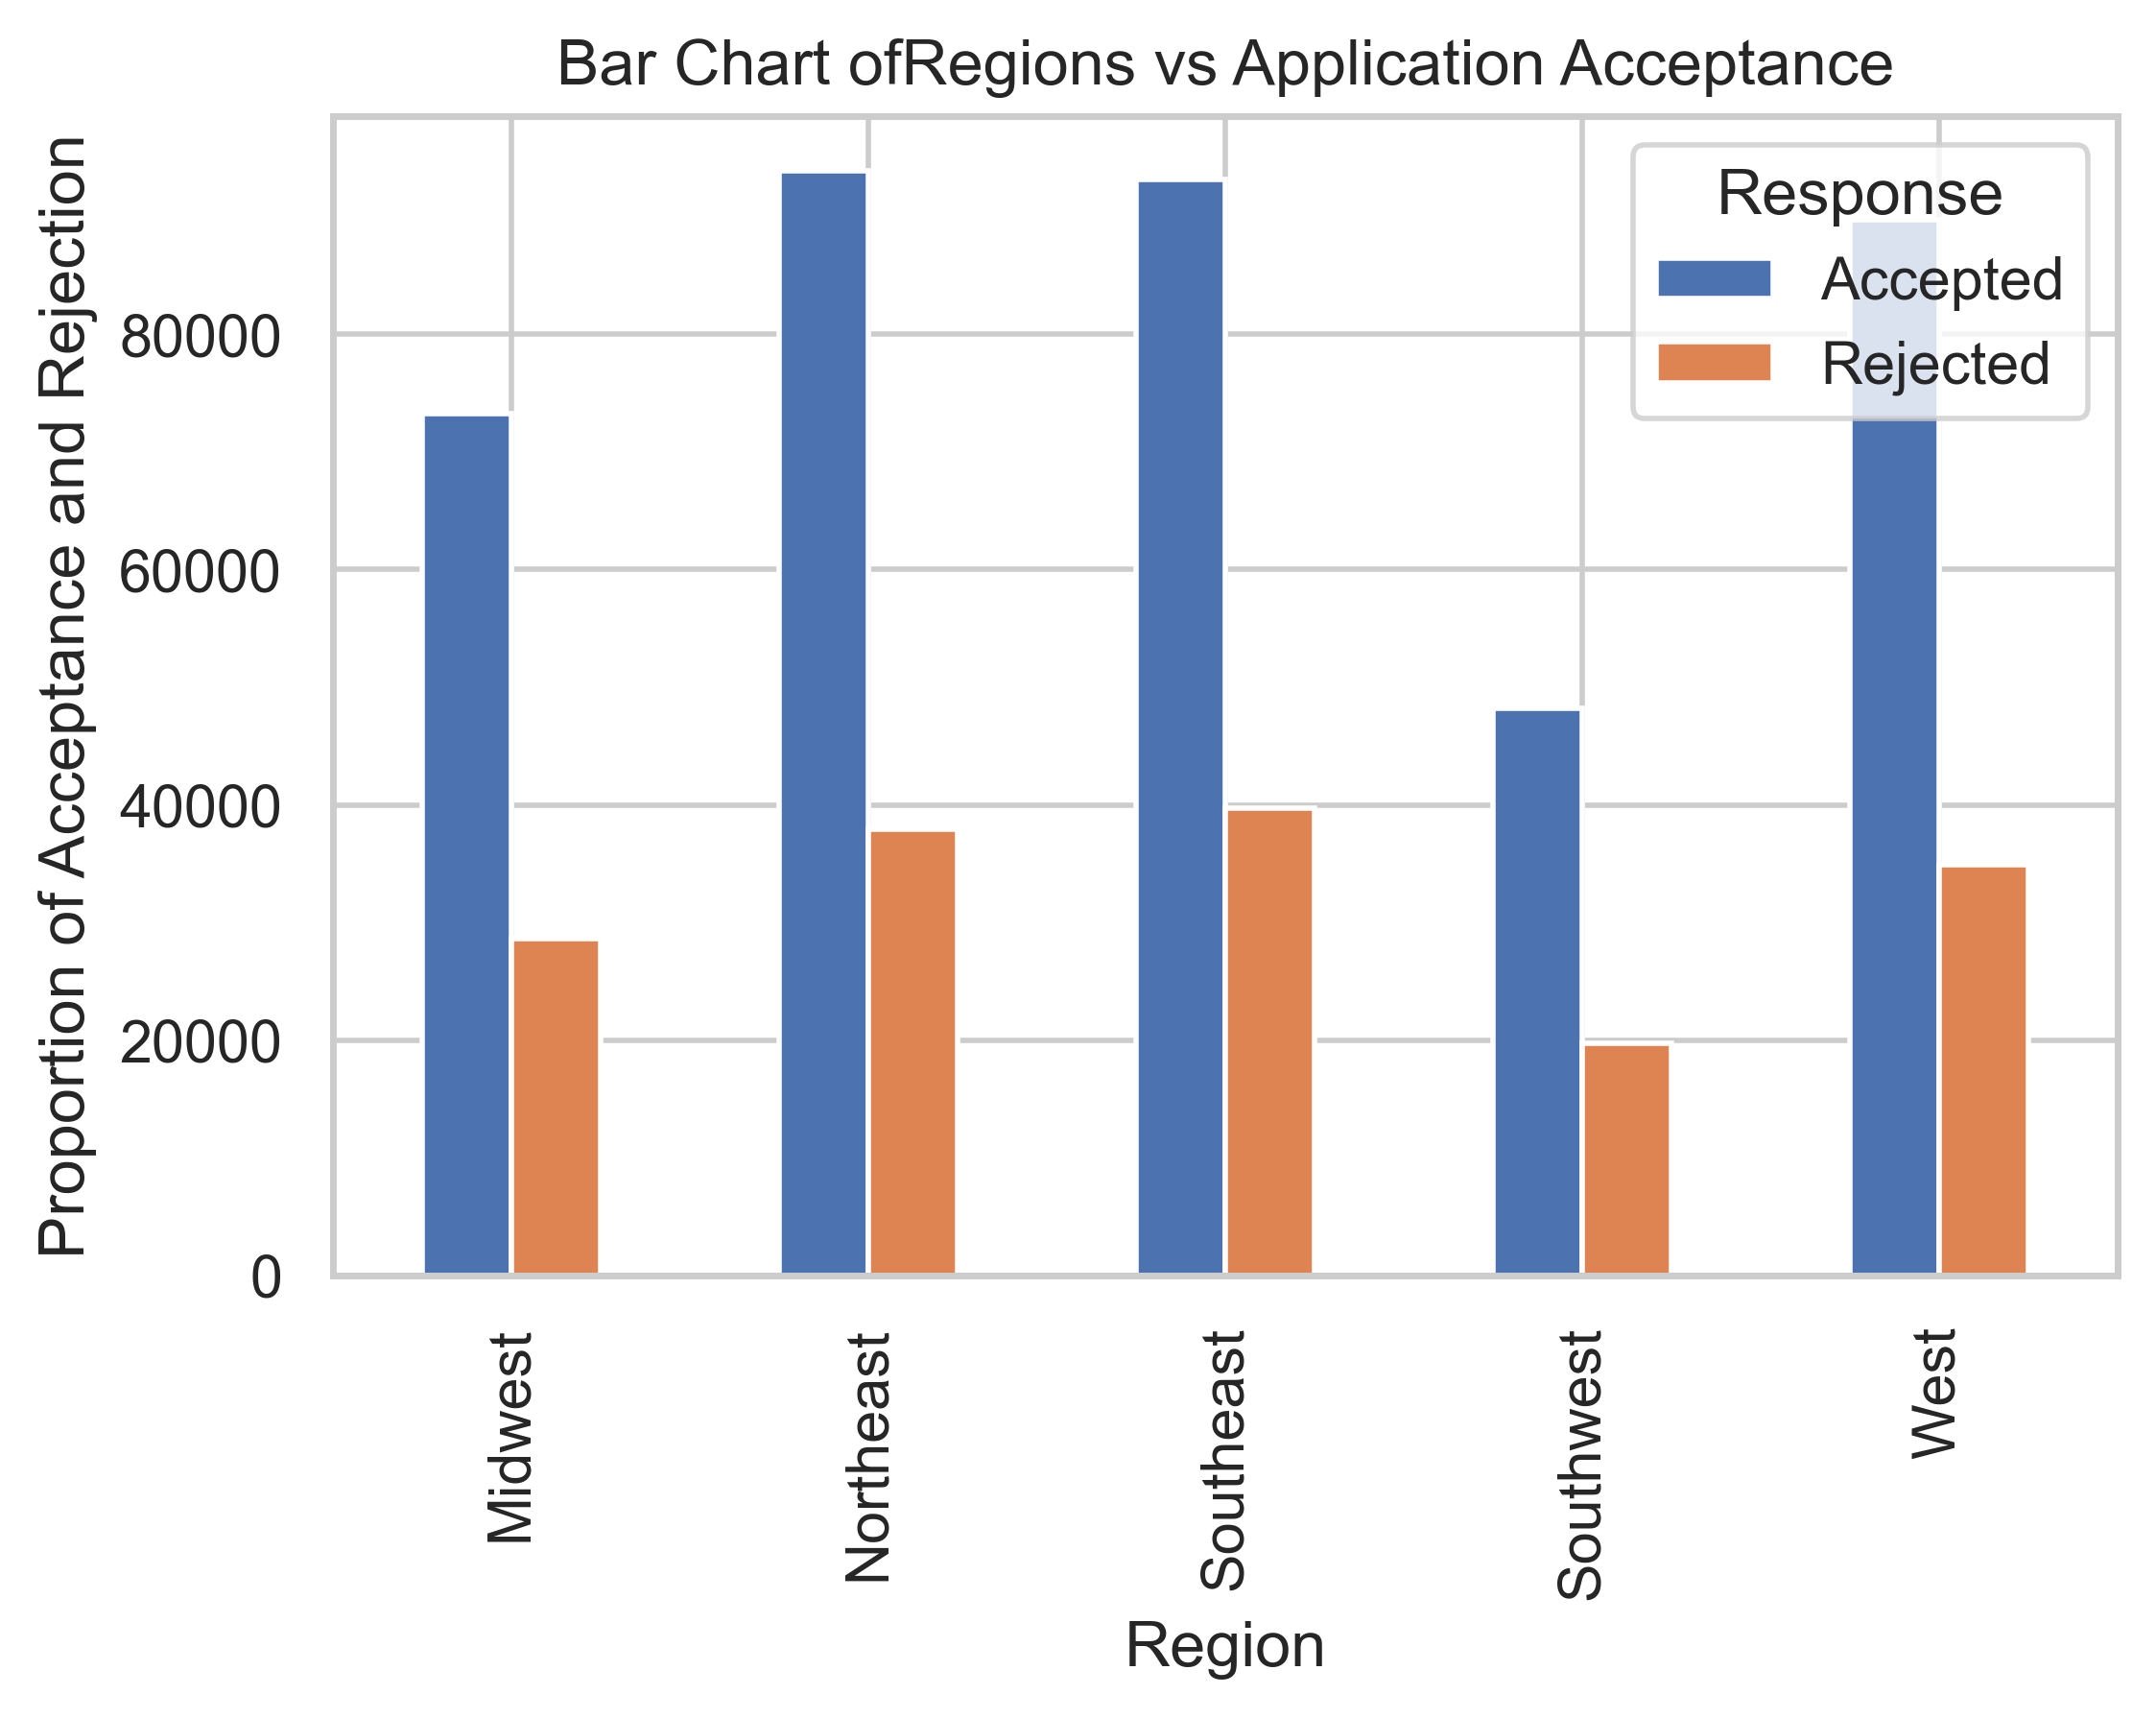

In [17]:
pd.crosstab(df['Region'],df['Response']).plot(kind='bar')
plt.title('Bar Chart ofRegions vs Application Acceptance')
plt.xlabel('Region')
plt.ylabel('Proportion of Acceptance and Rejection')

Text(0, 0.5, 'Proportion of Acceptance and Rejection')

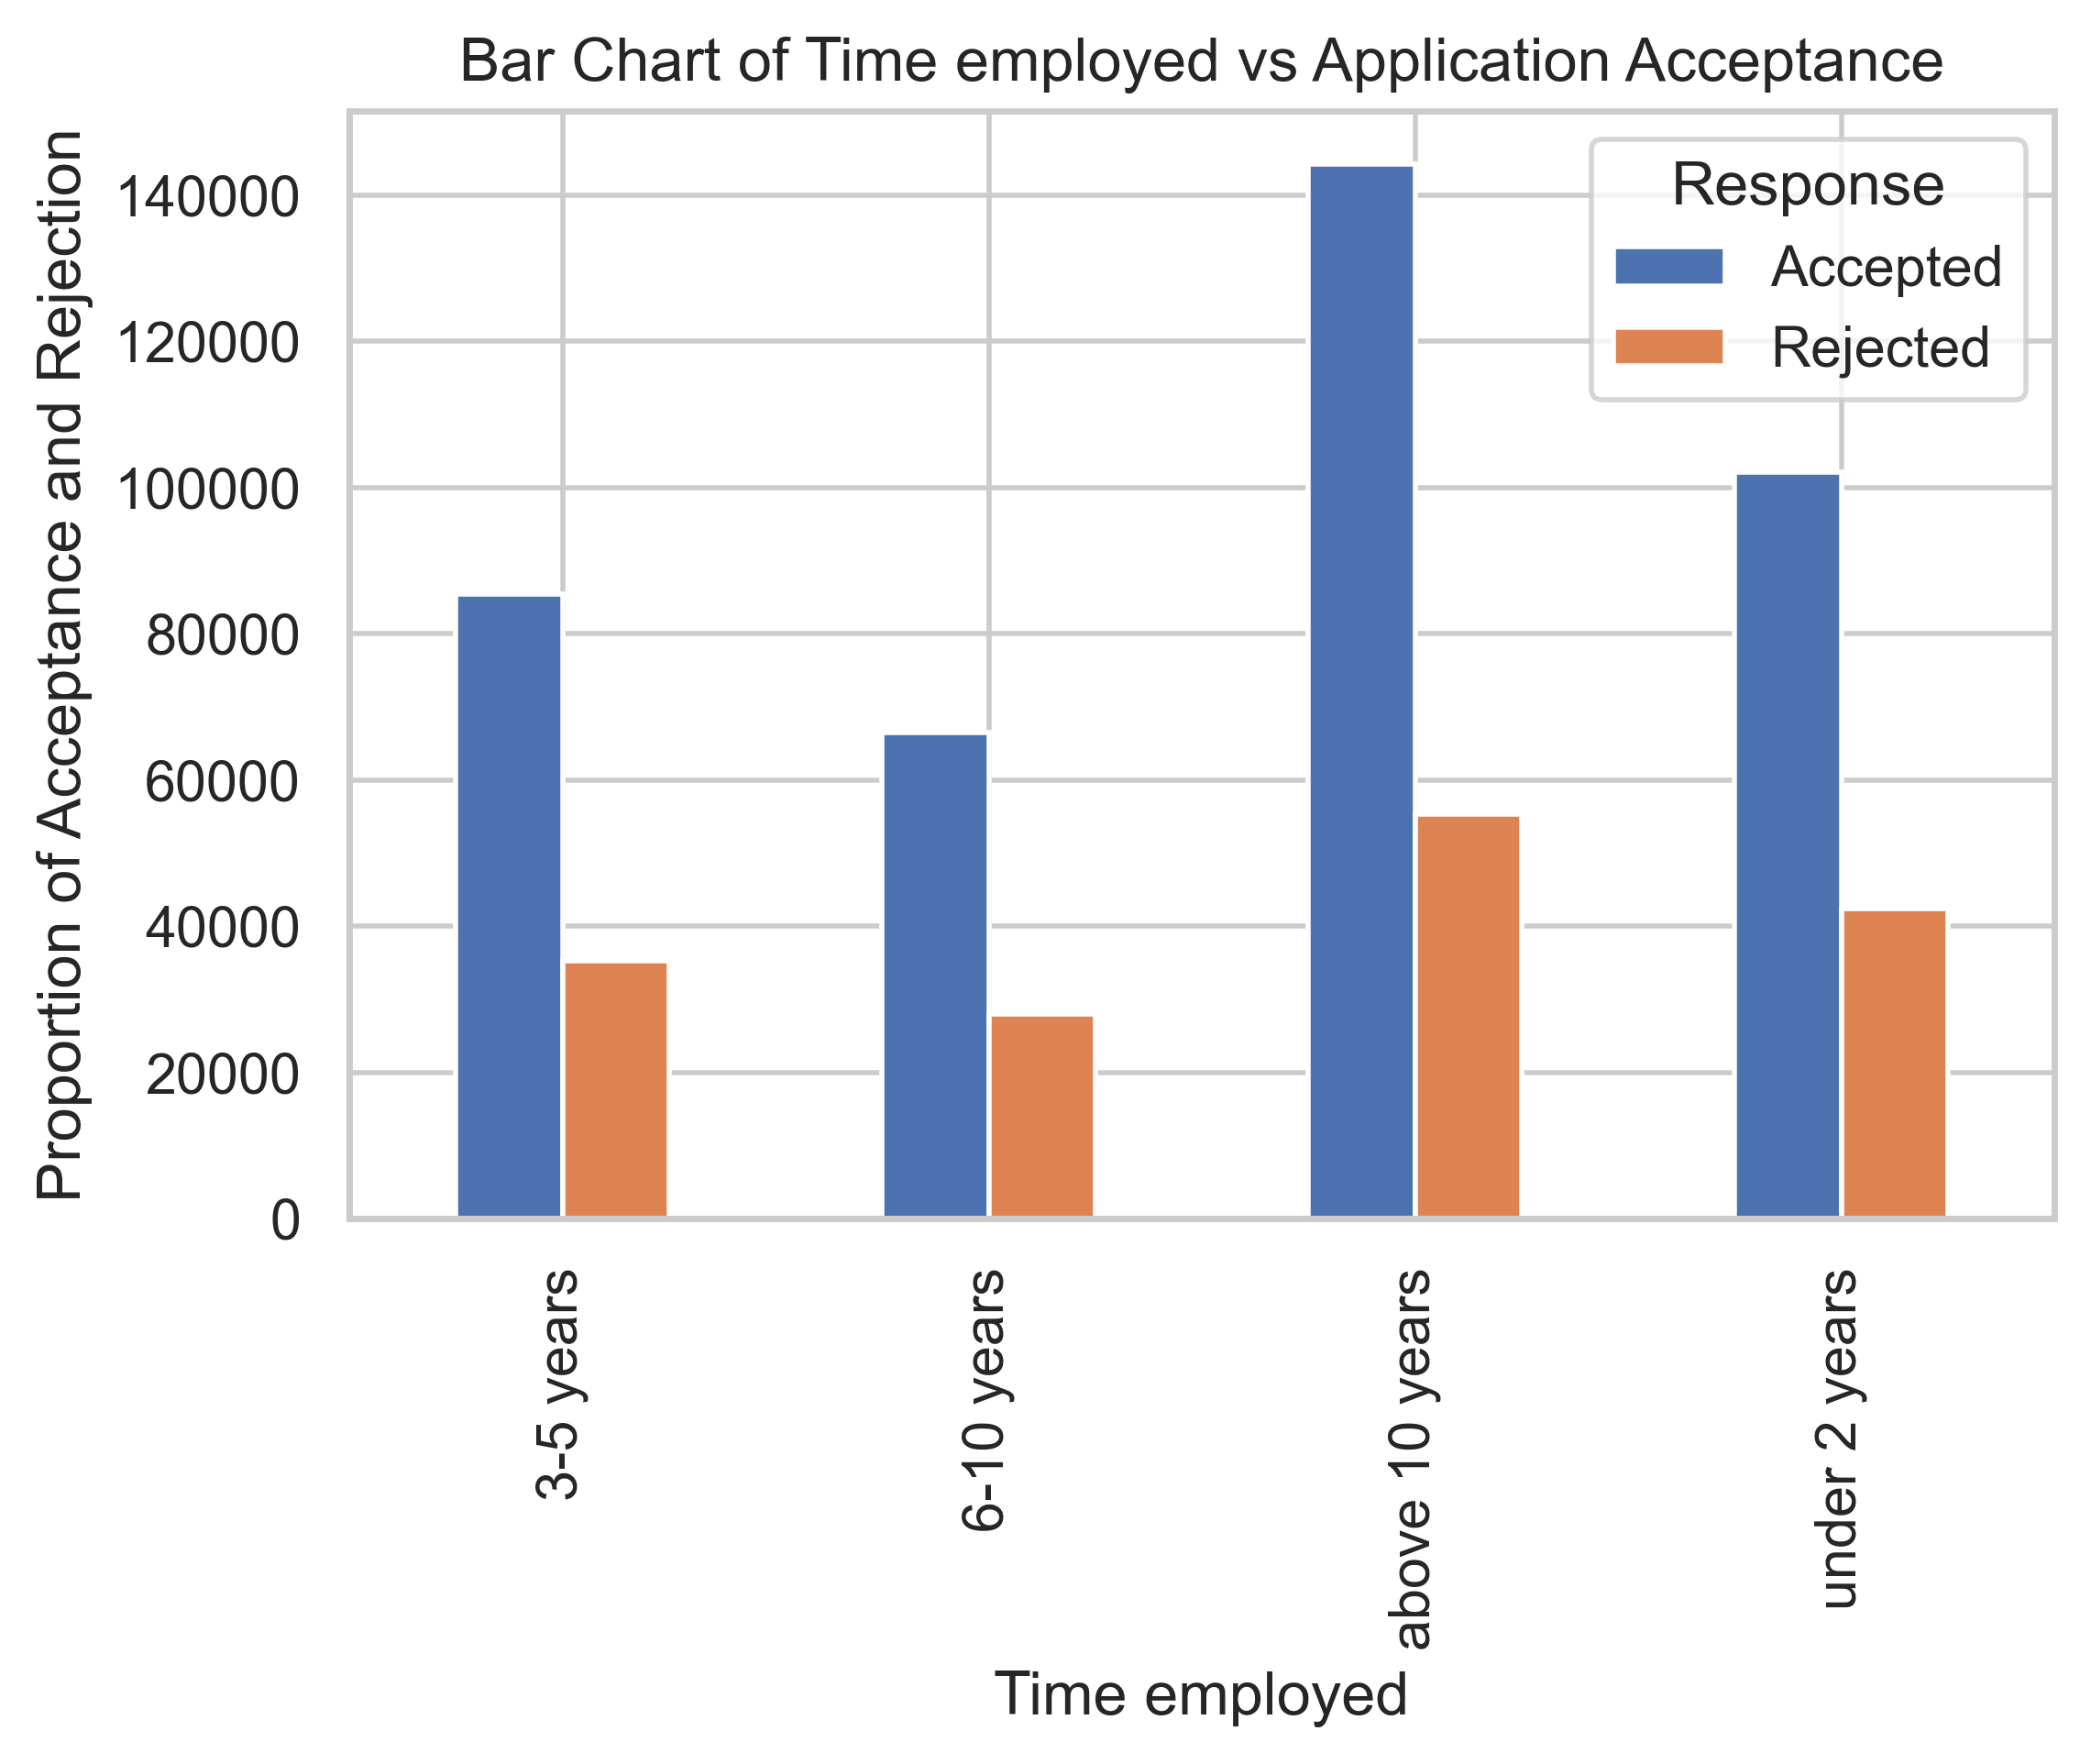

In [18]:
pd.crosstab(df['Time_work'],df['Response']).plot(kind='bar')
plt.title('Bar Chart of Time employed vs Application Acceptance')
plt.xlabel('Time employed')
plt.ylabel('Proportion of Acceptance and Rejection')

Text(0, 0.5, 'Proportion of Acceptance and Rejection')

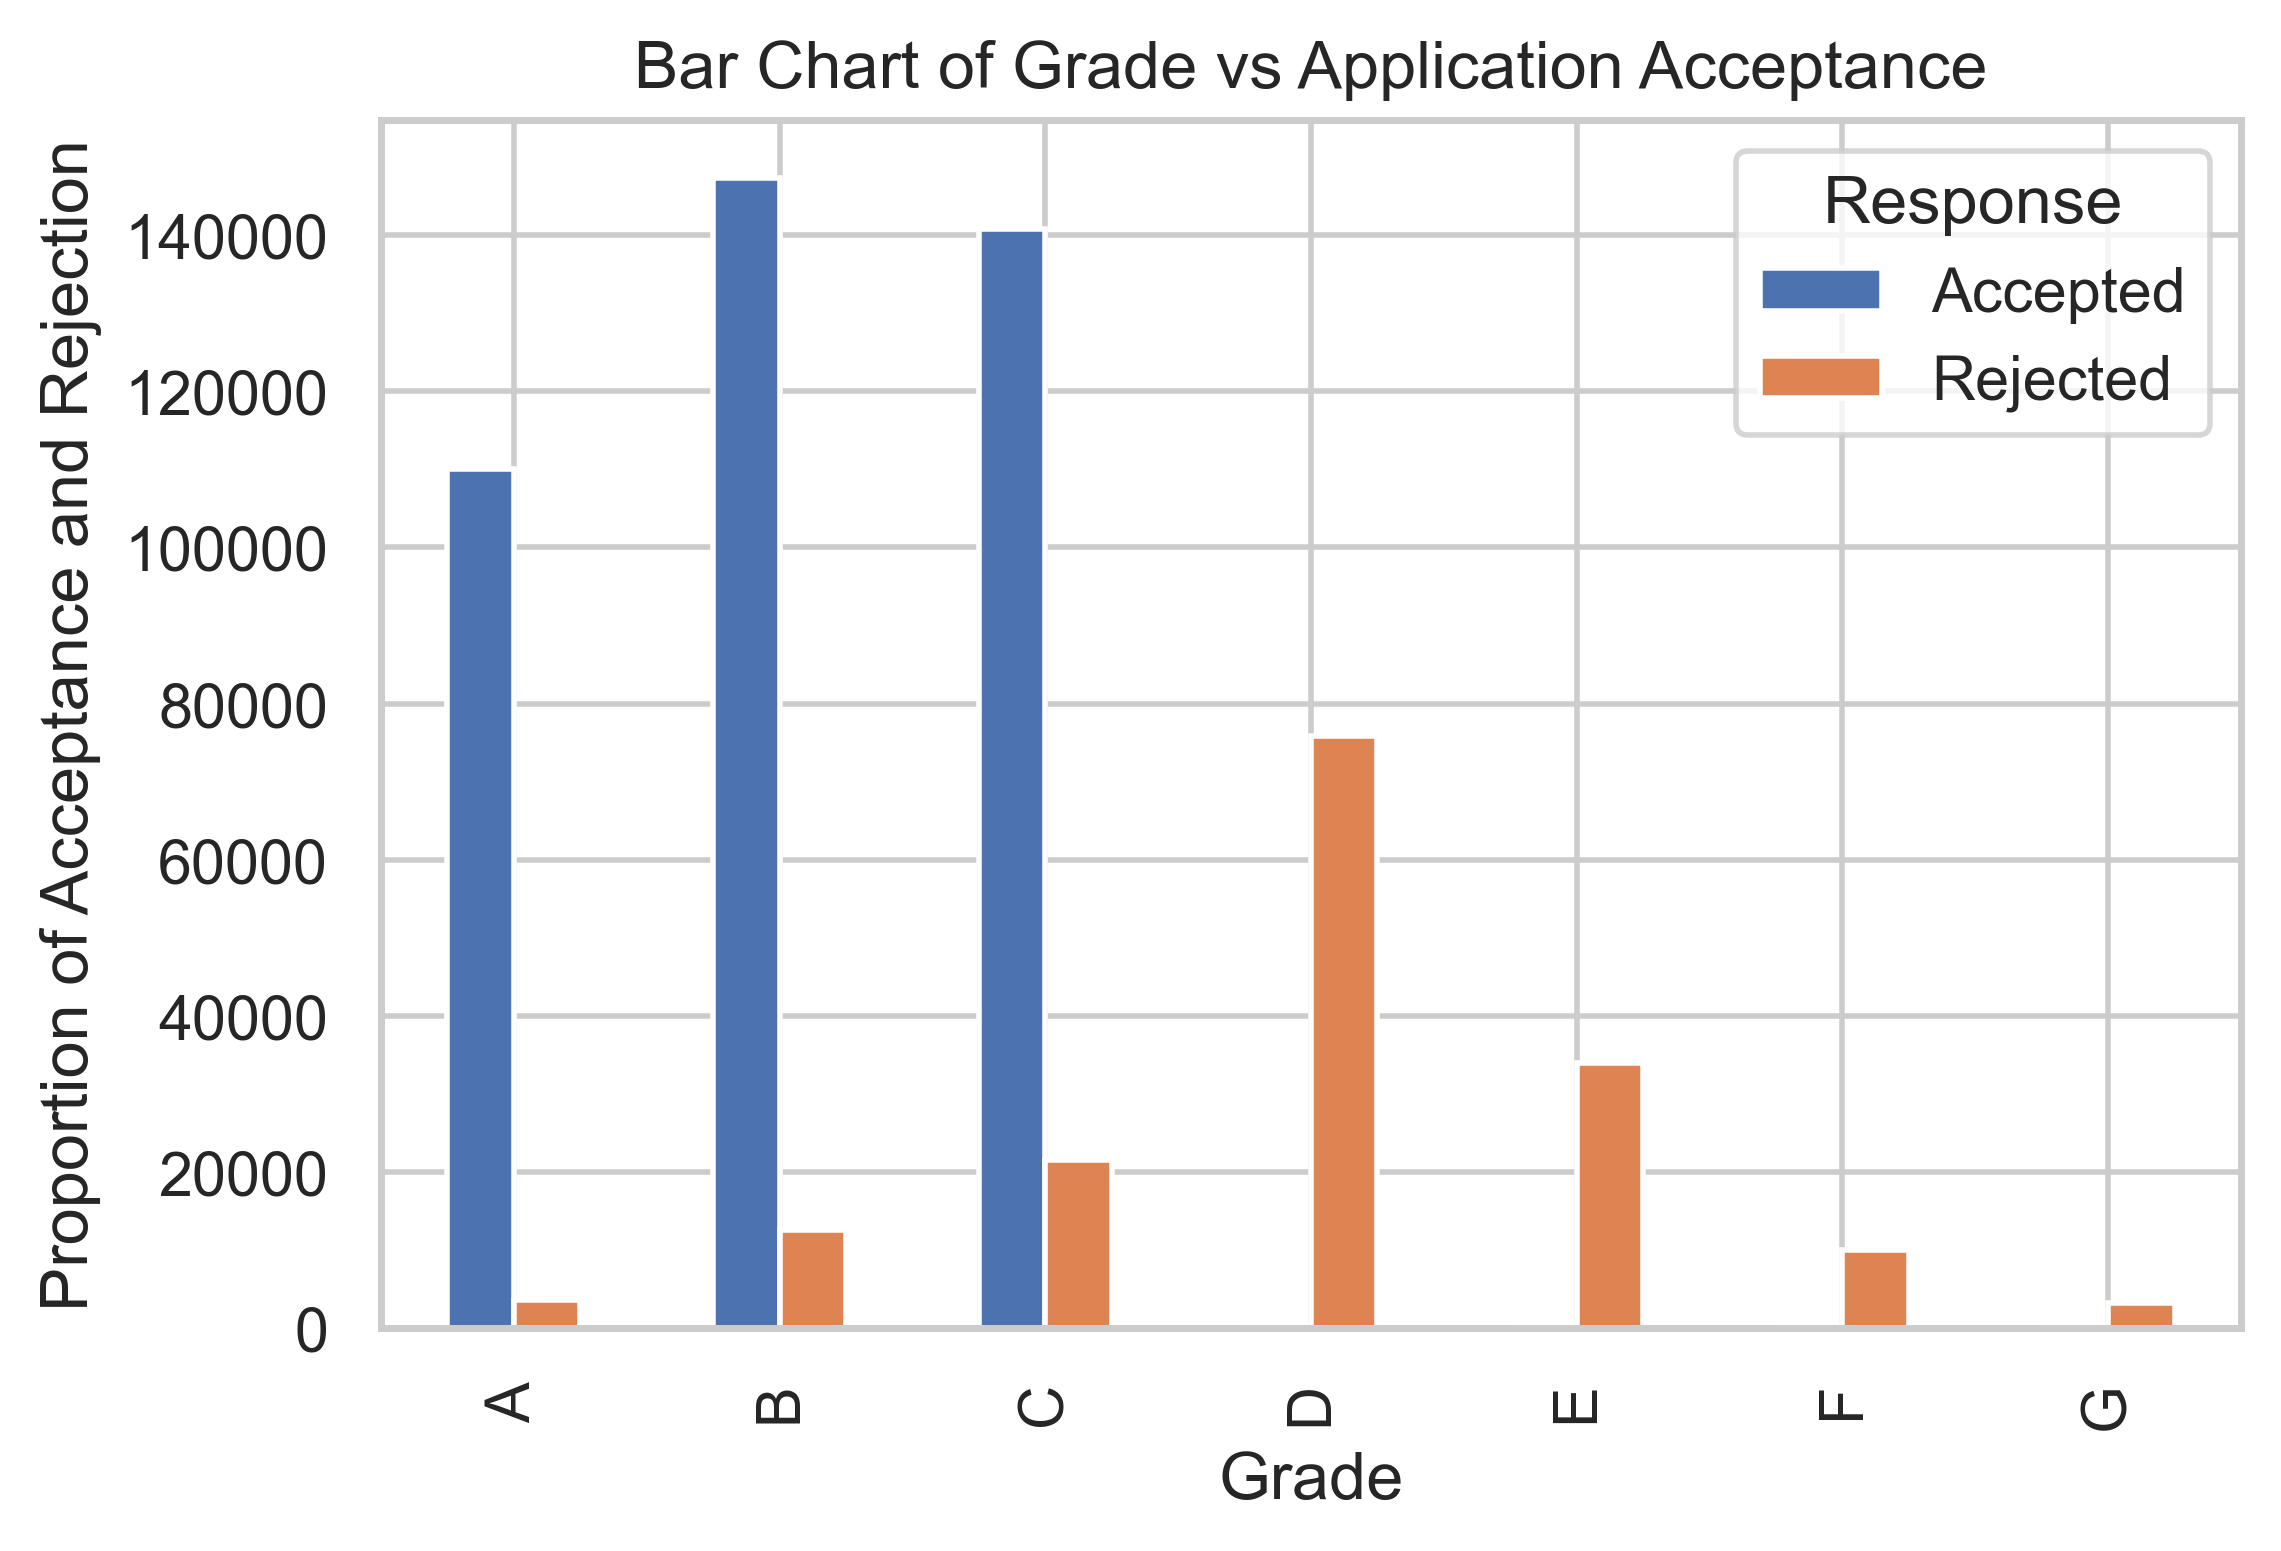

In [19]:
pd.crosstab(df['Grade'],df['Response']).plot(kind='bar')
plt.title('Bar Chart of Grade vs Application Acceptance')
plt.xlabel('Grade')
plt.ylabel('Proportion of Acceptance and Rejection')

### Create Dummy Variables

In [20]:
Loan_Stat_Dummies = pd.get_dummies(df['Loan_Stat'])

In [22]:
Grade_Dummies = pd.get_dummies(df['Grade'])

In [24]:
Time_employed_Dummies = pd.get_dummies(df['Time_work'])

In [26]:
Region_Dummies = pd.get_dummies(df['Region'])

In [31]:
final_df = pd.concat([df['Loan_Amt'],df['Cred_Score'],Loan_Stat_Dummies,Grade_Dummies,
                        Time_employed_Dummies,Region_Dummies,df['Response_Binary']], axis =1)

In [32]:
final_df.head()

,Loan_Amt,Cred_Score,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),A,...,3-5 years,6-10 years,above 10 years,under 2 years,Midwest,Northeast,Southeast,Southwest,West,Response_Binary
0,24700.0,719.0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1.0
1,11950.0,694.0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1.0
2,20000.0,709.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1.0
3,8000.0,704.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1.0
4,22400.0,714.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1.0


In [39]:
X = final_df.loc[:,final_df.columns != 'Response_Binary']
y = final_df.loc[:,final_df.columns =='Response_Binary']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
logic_reg.fit(X_test,y_test)

C:\Users\hoain\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hoain\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_pred = logic_reg.predict(X_test)

### Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [69]:
confusion_matrix

array([[ 48240,      1],
       [     0, 119491]], dtype=int64)

### Compute precision, recall, F-measure and support

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     48241
         1.0       1.00      1.00      1.00    119491

    accuracy                           1.00    167732
   macro avg       1.00      1.00      1.00    167732
weighted avg       1.00      1.00      1.00    167732

